In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split # 학습용과 테스트용 데이터로 분리해주는 함수
from sklearn.linear_model import LinearRegression # 선형회귀 모델
from sklearn.neighbors import * # 선형회귀 모델
from sklearn.metrics import mean_squared_error # 잔차 에러 평균, 오차제곱평균, 정확도 측정지표
from sklearn.metrics import accuracy_score # 모델 예측 정확도 측정 함수
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀보델 임포트
from sklearn.preprocessing import *
plt.rcParams['font.family'] = 'D2Coding'

In [89]:
bal = pd.read_csv('한국남동발전_발전소주변농도(일평균)최종.csv', encoding='cp949')
bal

,사업소,호기,일자,미세먼지,초미세먼지
0,영흥,내2리,20240619,41.01,35.51
1,영흥,내6리,20240619,47.5,27.5
2,영흥,선재도,20240619,23.28,19.93
3,영흥,외1리,20240619,25,25.06
4,영흥,외3리,20240619,41.01,20.25
...,...,...,...,...,...
11139,영흥,내6리,20200716,13.51,3.51
11140,영흥,대부도,20200716,9.59,5.53
11141,영흥,선재도,20200716,16.96,9.69
11142,영흥,외1리,20200716,20.34,13.18


In [90]:
bal.columns = ['사업소', '호기', '일자', '미세먼지', '초미세먼지']

In [91]:
bal['미세먼지'] = bal['미세먼지'].replace(['', ' '], np.nan)

In [92]:
bal['초미세먼지'] = bal['초미세먼지'].replace(['', ' '], np.nan)

In [93]:
bal['미세먼지'] = bal['미세먼지'].astype(float)
bal['초미세먼지'] = bal['초미세먼지'].astype(float)

In [94]:
bal['일자'] = bal['일자'].astype(object)

In [95]:
bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업소     11144 non-null  object 
 1   호기      11144 non-null  object 
 2   일자      11144 non-null  object 
 3   미세먼지    11143 non-null  float64
 4   초미세먼지   11143 non-null  float64
dtypes: float64(2), object(3)
memory usage: 435.4+ KB


In [338]:
bal['일자'].max()

KeyError: '미세먼지'

In [96]:
bal1 = bal[['사업소', '일자', '미세먼지', '초미세먼지']].copy()
bal1

,사업소,일자,미세먼지,초미세먼지
0,영흥,20240619,41.01,35.51
1,영흥,20240619,47.50,27.50
2,영흥,20240619,23.28,19.93
3,영흥,20240619,25.00,25.06
4,영흥,20240619,41.01,20.25
...,...,...,...,...
11139,영흥,20200716,13.51,3.51
11140,영흥,20200716,9.59,5.53
11141,영흥,20200716,16.96,9.69
11142,영흥,20200716,20.34,13.18


In [11]:
bal1['일자'] = pd.to_datetime(bal1['일자'], format='%Y%m%d')

In [97]:
youngh = bal1[bal1['사업소'] == '영흥']
boondang = bal1[bal1['사업소'] == '분당']
samchanpo = bal1[bal1['사업소'] == '삼천포']
youngdong = bal1[bal1['사업소'] == '영동']

In [98]:
youngh.reset_index(drop=True, inplace=True)
boondang.reset_index(drop=True, inplace=True)
samchanpo.reset_index(drop=True, inplace=True)
youngdong.reset_index(drop=True, inplace=True)

In [99]:
youngh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업소     7141 non-null   object 
 1   일자      7141 non-null   object 
 2   미세먼지    7141 non-null   float64
 3   초미세먼지   7141 non-null   float64
dtypes: float64(2), object(2)
memory usage: 223.3+ KB


In [15]:
youngh

,사업소,일자,미세먼지,초미세먼지
0,영흥,2024-06-19,41.01,35.51
1,영흥,2024-06-19,47.50,27.50
2,영흥,2024-06-19,23.28,19.93
3,영흥,2024-06-19,25.00,25.06
4,영흥,2024-06-19,41.01,20.25
...,...,...,...,...
7136,영흥,2020-07-16,13.51,3.51
7137,영흥,2020-07-16,9.59,5.53
7138,영흥,2020-07-16,16.96,9.69
7139,영흥,2020-07-16,20.34,13.18


In [16]:
youngh['일자'] = pd.to_datetime(youngh['일자'], format='%Y%m%d')
boondang['일자'] = pd.to_datetime(boondang['일자'], format='%Y%m%d')
samchanpo['일자'] = pd.to_datetime(samchanpo['일자'], format='%Y%m%d')
youngdong['일자'] = pd.to_datetime(youngdong['일자'], format='%Y%m%d')

C:\Users\human\AppData\Local\Temp\ipykernel_16848\353745367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youngh['일자'] = pd.to_datetime(youngh['일자'], format='%Y%m%d')
C:\Users\human\AppData\Local\Temp\ipykernel_16848\353745367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boondang['일자'] = pd.to_datetime(boondang['일자'], format='%Y%m%d')
C:\Users\human\AppData\Local\Temp\ipykernel_16848\353745367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [100]:
youngh = youngh.sort_values(by='일자', ascending=True)
youngh.reset_index(drop=True, inplace=True)

In [101]:
youngh

,사업소,일자,미세먼지,초미세먼지
0,영흥,20200716,9.01,3.01
1,영흥,20200716,9.26,1.01
2,영흥,20200716,13.51,3.51
3,영흥,20200716,20.34,13.18
4,영흥,20200716,16.96,9.69
...,...,...,...,...
7136,영흥,20240619,41.01,20.25
7137,영흥,20240619,25.00,25.06
7138,영흥,20240619,23.28,19.93
7139,영흥,20240619,47.50,27.50


In [102]:
youngh[['미세먼지', '초미세먼지']].mean()

미세먼지     66.062442
초미세먼지    29.215897
dtype: float64

In [103]:
youngh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업소     7141 non-null   object 
 1   일자      7141 non-null   object 
 2   미세먼지    7141 non-null   float64
 3   초미세먼지   7141 non-null   float64
dtypes: float64(2), object(2)
memory usage: 223.3+ KB


In [104]:
youngh[['일자', '미세먼지', '초미세먼지']].corr()

,일자,미세먼지,초미세먼지
일자,1.000000,0.084544,0.007986
미세먼지,0.084544,1.000000,0.174922
초미세먼지,0.007986,0.174922,1.000000


In [ ]:
plt.figure(figsize=(50, 20))
plt.plot(youngh['일자'], youngh['미세먼지'], color='y', label='미세먼지')
plt.xticks(youngh['일자'], rotation=90)
plt.title('영흥 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

In [183]:
boondang = boondang.sort_values(by='일자', ascending=True)
boondang.reset_index(drop=True, inplace=True)

In [184]:
boondang

,사업소,일자,미세먼지,초미세먼지,년도
0,분당,2020.07,26.01,16.01,2020
1,분당,2020.07,17.01,7.00,2020
2,분당,2020.07,35.00,12.01,2020
3,분당,2020.07,20.00,9.00,2020
4,분당,2020.07,21.00,8.00,2020
...,...,...,...,...,...
422,분당,2021.09,10.99,0.11,2021
423,분당,2021.09,19.00,13.00,2021
424,분당,2021.09,19.97,17.00,2021
425,분당,2021.09,30.00,17.00,2021


In [185]:
samchanpo = samchanpo.sort_values(by='일자', ascending=True)
samchanpo.reset_index(drop=True, inplace=True)

In [186]:
samchanpo

,사업소,일자,미세먼지,초미세먼지,년도
0,삼천포,2020.07,22.18,7.12,2020
1,삼천포,2020.07,7.00,26.00,2020
2,삼천포,2020.07,24.59,13.74,2020
3,삼천포,2020.07,20.23,3.90,2020
4,삼천포,2020.07,0.00,24.00,2020
...,...,...,...,...,...
2404,삼천포,2021.09,19.48,8.13,2021
2405,삼천포,2021.09,13.86,2.11,2021
2406,삼천포,2021.09,0.00,0.00,2021
2407,삼천포,2021.09,18.39,6.62,2021


In [187]:
youngdong = youngdong.sort_values(by='일자', ascending=True)
youngdong.reset_index(drop=True, inplace=True)

In [188]:
youngdong

,사업소,일자,미세먼지,초미세먼지,년도
0,영동,2020.07,0.00,0.00,2020
1,영동,2020.07,0.00,0.00,2020
2,영동,2020.07,12.17,3.95,2020
3,영동,2020.07,7.59,2.24,2020
4,영동,2020.07,4.83,0.00,2020
...,...,...,...,...,...
1162,영동,2021.09,6.45,2.18,2021
1163,영동,2021.09,5.59,0.00,2021
1164,영동,2021.09,0.00,1.46,2021
1165,영동,2021.09,6.92,0.00,2021


In [200]:
bal2 = bal1.sort_values(by=['일자', '사업소'], ascending=True)
bal2

,사업소,일자,미세먼지,초미세먼지
11127,분당,20200716,26.01,16.01
11128,삼천포,20200716,22.74,9.88
11129,삼천포,20200716,24.72,8.74
11130,삼천포,20200716,0.00,0.00
11131,삼천포,20200716,19.05,17.00
...,...,...,...,...
0,영흥,20240619,41.01,35.51
1,영흥,20240619,47.50,27.50
2,영흥,20240619,23.28,19.93
3,영흥,20240619,25.00,25.06


In [201]:
bal2.reset_index(drop=True, inplace=True)

In [202]:
bal2

,사업소,일자,미세먼지,초미세먼지
0,분당,20200716,26.01,16.01
1,삼천포,20200716,22.74,9.88
2,삼천포,20200716,24.72,8.74
3,삼천포,20200716,0.00,0.00
4,삼천포,20200716,19.05,17.00
...,...,...,...,...
11139,영흥,20240619,41.01,35.51
11140,영흥,20240619,47.50,27.50
11141,영흥,20240619,23.28,19.93
11142,영흥,20240619,25.00,25.06


In [192]:
bal3 = bal2.copy()

In [193]:
bal3['일자'] = bal3['일자'].astype(object)

In [194]:
bal3['사업소'].unique()

array(['분당', '삼천포', '영동', '영흥'], dtype=object)

In [195]:
bal3.info

<bound method DataFrame.info of        사업소        일자   미세먼지  초미세먼지
0       분당  20200716  26.01  16.01
1      삼천포  20200716  22.74   9.88
2      삼천포  20200716  24.72   8.74
3      삼천포  20200716   0.00   0.00
4      삼천포  20200716  19.05  17.00
...    ...       ...    ...    ...
11139   영흥  20240619  41.01  35.51
11140   영흥  20240619  47.50  27.50
11141   영흥  20240619  23.28  19.93
11142   영흥  20240619  25.00  25.06
11143   영흥  20240619  41.01  20.25

[11144 rows x 4 columns]>

In [196]:
# '날짜' 열을 datetime 형식으로 변환
bal3['일자'] = pd.to_datetime(bal3['일자'])

# '날짜' 열을 '년-월' 형식으로 변환
bal3['년'] = bal3['일자'].dt.to_period('M')

# '년-월'을 인덱스로 설정
bal3.set_index('년', inplace=True)

In [197]:
bal3.reset_index(drop=False, inplace=True)

In [198]:
bal3

,년,사업소,일자,미세먼지,초미세먼지
0,2020-07,분당,2020-07-16,26.01,16.01
1,2020-07,삼천포,2020-07-16,22.74,9.88
2,2020-07,삼천포,2020-07-16,24.72,8.74
3,2020-07,삼천포,2020-07-16,0.00,0.00
4,2020-07,삼천포,2020-07-16,19.05,17.00
...,...,...,...,...,...
11139,2024-06,영흥,2024-06-19,41.01,35.51
11140,2024-06,영흥,2024-06-19,47.50,27.50
11141,2024-06,영흥,2024-06-19,23.28,19.93
11142,2024-06,영흥,2024-06-19,25.00,25.06


In [222]:
youngh = bal2[bal2['사업소'] == '영흥']
boondang = bal2[bal2['사업소'] == '분당']
samchanpo = bal2[bal2['사업소'] == '삼천포']
youngdong = bal2[bal2['사업소'] == '영동']

youngh.reset_index(drop=True, inplace=True)
boondang.reset_index(drop=True, inplace=True)
samchanpo.reset_index(drop=True, inplace=True)
youngdong.reset_index(drop=True, inplace=True)

In [223]:
boondang

,사업소,일자,미세먼지,초미세먼지,년도
0,분당,2021.09,11.00,3.01,2021
1,분당,2021.09,15.00,5.01,2021
2,분당,2021.09,11.00,6.00,2021
3,분당,2021.09,18.01,9.00,2021
4,분당,2021.09,26.00,7.00,2021
...,...,...,...,...,...
422,분당,2020.07,28.00,17.00,2020
423,분당,2020.07,20.00,11.01,2020
424,분당,2020.07,16.01,13.01,2020
425,분당,2020.07,41.00,21.00,2020


In [203]:
len(youngh[youngh['미세먼지'] == 0])

367

In [204]:
def reqStr(x):
    return x[0:4] + '.' + x[4:6]

In [205]:
def req(x):
    return x[0:4]

In [206]:
bal1['일자'] = bal1['일자'].astype(str)

In [207]:
bal1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업소     11144 non-null  object 
 1   일자      11144 non-null  object 
 2   미세먼지    11143 non-null  float64
 3   초미세먼지   11143 non-null  float64
dtypes: float64(2), object(2)
memory usage: 348.4+ KB


In [169]:
bal1

,사업소,일자,미세먼지,초미세먼지
0,영흥,20240619,41.01,35.51
1,영흥,20240619,47.50,27.50
2,영흥,20240619,23.28,19.93
3,영흥,20240619,25.00,25.06
4,영흥,20240619,41.01,20.25
...,...,...,...,...
11139,영흥,20200716,13.51,3.51
11140,영흥,20200716,9.59,5.53
11141,영흥,20200716,16.96,9.69
11142,영흥,20200716,20.34,13.18


In [208]:
bal2 = bal1.copy()
bal2['일자'] = bal1['일자'].apply(reqStr)

In [209]:
bal2['일자']

0        2024.06
1        2024.06
2        2024.06
3        2024.06
4        2024.06
          ...   
11139    2020.07
11140    2020.07
11141    2020.07
11142    2020.07
11143    2020.07
Name: 일자, Length: 11144, dtype: object

In [210]:
bal2['년도'] = bal2['일자'].str.slice(0, 4)

In [221]:
bal2

,사업소,일자,미세먼지,초미세먼지,년도
0,영흥,2024.06,41.01,35.51,2024
1,영흥,2024.06,47.50,27.50,2024
2,영흥,2024.06,23.28,19.93,2024
3,영흥,2024.06,25.00,25.06,2024
4,영흥,2024.06,41.01,20.25,2024
...,...,...,...,...,...
11139,영흥,2020.07,13.51,3.51,2020
11140,영흥,2020.07,9.59,5.53,2020
11141,영흥,2020.07,16.96,9.69,2020
11142,영흥,2020.07,20.34,13.18,2020


In [5]:
mis = pd.read_csv('미세먼지_PM10__월별_도시별_대기오염도_20240619163513.csv', encoding='cp949')

In [6]:
mis

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,총계,소계,39,38,40,41,34,34,20,24,...,42,39,33,22,22,19,22,26,39,35
1,서울특별시,서울특별시,42,41,45,44,35,36,21,23,...,41,45,33,22,25,20,22,25,39,38
2,부산광역시,부산광역시,32,34,33,36,32,27,18,31,...,38,32,31,19,20,19,20,21,33,30
3,대구광역시,대구광역시,37,38,38,39,38,35,22,25,...,42,36,33,22,20,18,20,24,41,35
4,인천광역시,인천광역시,42,37,41,39,31,32,21,24,...,42,44,32,21,26,21,26,30,41,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,경상남도,합천,25,26,27,29,29,29,17,27,...,30,29,30,23,24,22,20,20,29,28
168,경상남도,도평균,29,32,31,33,32,29,20,29,...,34,29,29,19,21,19,20,21,31,28
169,제주특별자치도,제주,35,38,39,44,38,28,21,24,...,42,32,29,20,18,17,28,27,34,32
170,제주특별자치도,서귀포,29,32,33,40,35,27,19,32,...,39,30,28,22,23,19,28,24,27,25


In [7]:
mis[mis['구분(2)'] == '서천']

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
86,충청남도,서천,41,45,48,46,33,32,19,25,...,40,39,30,19,21,17,23,29,41,38


In [214]:
mis[mis['구분(2)'] == '영동']

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
68,충청북도,영동,41,40,42,43,33,36,16,20,...,43,35,32,25,21,16,14,17,31,31


In [ ]:
sach

In [215]:
inc = mis[mis['구분(2)'] == '인천광역시']
inc

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
4,인천광역시,인천광역시,42,37,41,39,31,32,21,24,...,42,44,32,21,26,21,26,30,41,38


In [216]:
inc = mis[mis['구분(2)'] == '인천광역시']
inc = inc.iloc[:, 2:].copy()
inc.reset_index(drop=True, inplace=True)
inc = inc.transpose().reset_index()
inc.columns = ['날짜', '인천 미세먼지 농도']
inc['인천 미세먼지 농도'] = inc['인천 미세먼지 농도'].astype(int)
inc

,날짜,인천 미세먼지 농도
0,2020.01,42
1,2020.02,37
2,2020.03,41
3,2020.04,39
4,2020.05,31
5,2020.06,32
6,2020.07,21
7,2020.08,24
8,2020.09,20
9,2020.10,34


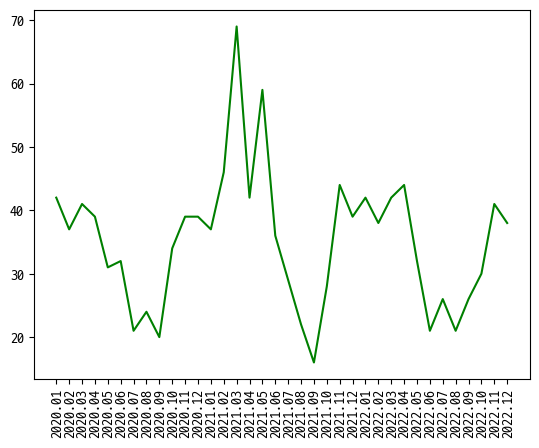

In [219]:
plt.plot(inc['날짜'], inc['인천 미세먼지 농도'], color='g', label='인천')
plt.xticks(rotation=90)
plt.show()

In [220]:
youngh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업소     7141 non-null   object 
 1   일자      7141 non-null   object 
 2   미세먼지    7141 non-null   float64
 3   초미세먼지   7141 non-null   float64
 4   년도      7141 non-null   object 
dtypes: float64(2), object(3)
memory usage: 279.1+ KB


In [239]:
youngh1 = youngh.groupby('일자')[['미세먼지', '초미세먼지']].mean()
youngh1

,미세먼지,초미세먼지
일자,,
2020.07,20.379896,9.720000
2020.08,22.648548,9.957312
2020.09,22.989278,41.654889
2020.10,56.488710,67.187849
2020.11,37.379444,39.047167
2020.12,37.466613,27.361452
2021.01,39.324194,31.764301
2021.02,48.495595,16.342976
2021.03,344.062419,81.095054


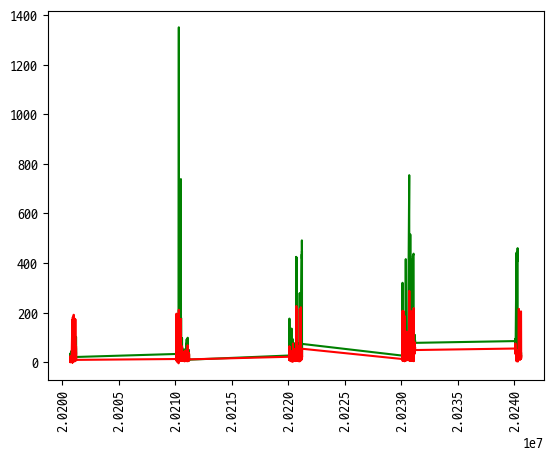

In [142]:
plt.plot(youngh1.index, youngh1['미세먼지'], color='g', label='영흥 미세먼지')
plt.plot(youngh1.index, youngh1['초미세먼지'], color='r', label='영흥 초미세먼지')
plt.xticks(rotation=90)
plt.show()

In [272]:
samchanpo

,사업소,일자,미세먼지,초미세먼지,년도
0,삼천포,2021.09,11.72,2.72,2021
1,삼천포,2021.09,14.10,5.77,2021
2,삼천포,2021.09,10.90,3.09,2021
3,삼천포,2021.09,36.72,4.55,2021
4,삼천포,2021.09,8.06,3.10,2021
...,...,...,...,...,...
2404,삼천포,2020.07,24.72,8.74,2020
2405,삼천포,2020.07,0.00,0.00,2020
2406,삼천포,2020.07,19.05,17.00,2020
2407,삼천포,2020.07,49.00,26.00,2020


In [273]:
samchanpo1 = samchanpo.groupby('일자')[['미세먼지', '초미세먼지']].mean()
samchanpo1

,미세먼지,초미세먼지
일자,,
2020.07,54.278864,24.608068
2020.08,82.496667,26.015370
2020.09,86.431722,24.136333
2020.10,54.666129,19.492688
2020.11,118.402667,18.224444
2020.12,101.476774,17.023226
2021.01,62.184140,18.689839
2021.02,35.572202,22.255714
2021.03,60.285914,39.142634


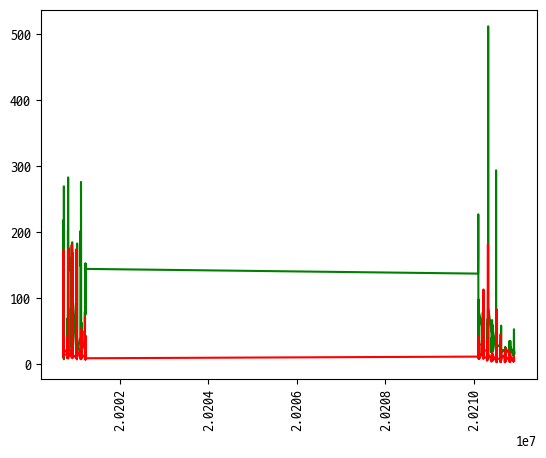

In [144]:
plt.plot(samchanpo1.index, samchanpo1['미세먼지'], color='g', label='삼천포 미세먼지')
plt.plot(samchanpo1.index, samchanpo1['초미세먼지'], color='r', label='삼천포 초미세먼지')
plt.xticks(rotation=90)
plt.show()

In [151]:
youngdong1 = youngdong.groupby('일자')[['미세먼지', '초미세먼지']].mean()
youngdong1

,미세먼지,초미세먼지
일자,,
20200716,7.390000,1.712500
20200717,8.270000,1.517500
20200718,7.282500,1.780000
20200719,10.262500,2.362500
20200720,8.887500,2.055000
...,...,...
20210913,4.566667,2.436667
20210914,5.016667,1.436667
20210915,5.816667,1.410000


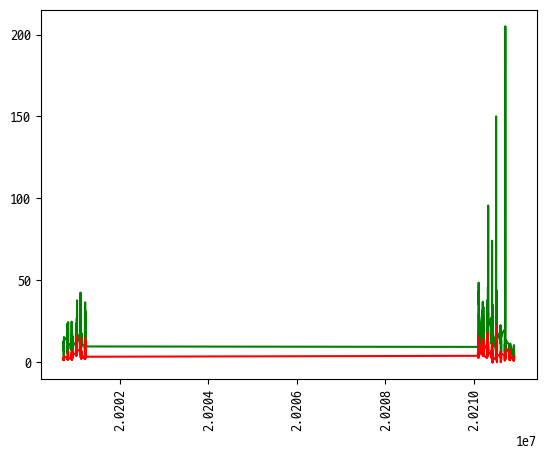

In [146]:
plt.plot(youngdong1.index, youngdong1['미세먼지'], color='g', label='삼천포 미세먼지')
plt.plot(youngdong1.index, youngdong1['초미세먼지'], color='r', label='삼천포 초미세먼지')
plt.xticks(rotation=90)
plt.show()

In [224]:
boondang1 = boondang.groupby('일자')[['미세먼지', '초미세먼지']].mean()
boondang1

,미세먼지,초미세먼지
일자,,
2020.07,22.323125,12.830000
2020.08,23.067742,12.002903
2020.09,17.635667,12.103000
2020.10,15.000000,12.906774
2020.11,15.000000,8.000000
2020.12,15.000000,8.000000
2021.01,15.000000,9.936774
2021.02,24.676429,25.755000
2021.03,55.352258,29.680968


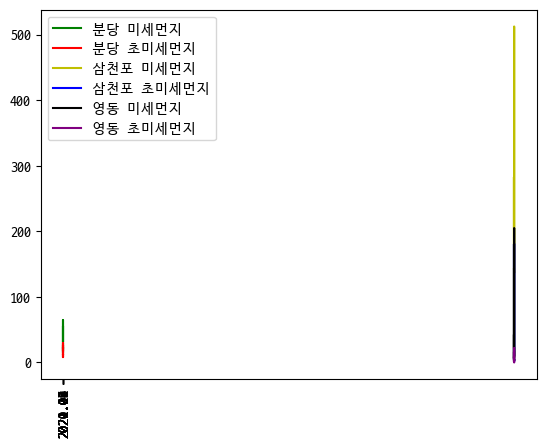

In [218]:
plt.plot(boondang1.index, boondang1['미세먼지'], color='g', label='분당 미세먼지')
plt.plot(boondang1.index, boondang1['초미세먼지'], color='r', label='분당 초미세먼지')
plt.plot(samchanpo1.index, samchanpo1['미세먼지'], color='y', label='삼천포 미세먼지')
plt.plot(samchanpo1.index, samchanpo1['초미세먼지'], color='b', label='삼천포 초미세먼지')
plt.plot(youngdong1.index, youngdong1['미세먼지'], color='black', label='영동 미세먼지')
plt.plot(youngdong1.index, youngdong1['초미세먼지'], color='purple', label='영동 초미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [149]:
youngh[youngh['년도'] == 2020]

KeyError: '년도'

In [152]:
tmp = youngh.sort_values('미세먼지', ascending=False)
tmp

,사업소,일자,미세먼지,초미세먼지
1498,영흥,20210322,1986.0,32.94
5971,영흥,20230824,1986.0,4.47
5966,영흥,20230823,1986.0,9.39
5961,영흥,20230822,1986.0,6.69
1492,영흥,20210321,1986.0,17.07
...,...,...,...,...
3426,영흥,20220211,-15.0,-18.99
5155,영흥,20230124,-15.0,0.00
1083,영흥,20210112,-15.0,41.10
3431,영흥,20220212,-15.0,-18.99


In [153]:
plt.plot(youngh[youngh['년도'] == 2020], youngh['미세먼지'])
plt.xticks(rotation=90)
plt.show()

KeyError: '년도'

In [274]:
sachan_df

,날짜,사천 미세먼지 농도
6,2020.07,16
7,2020.08,28
8,2020.09,22
9,2020.10,27
10,2020.11,30
11,2020.12,30
12,2021.01,33
13,2021.02,33
14,2021.03,52
15,2021.04,32


In [ ]:
sachan_df = mis[mis['구분(2)'] == '서울특별시']
sachan_df = sachan_df.iloc[:, 2:].copy()
sachan_df.reset_index(drop=True, inplace=True)
sachan_df = sachan_df.transpose().reset_index()
sachan_df.columns = ['날짜', '서울 미세먼지 농도']
sachan_df['서울 미세먼지 농도'] = sachan_df['서울 미세먼지 농도'].astype(int)
sachan_df

In [269]:
soule = mis[mis['구분(2)'] == '서울특별시']
soule = soule.iloc[:, 2:].copy()
soule.reset_index(drop=True, inplace=True)
soule = soule.transpose().reset_index()
soule.columns = ['날짜', '서울 미세먼지 농도']
soule['서울 미세먼지 농도'] = soule['서울 미세먼지 농도'].astype(int)
soule

,날짜,서울 미세먼지 농도
0,2020.01,42
1,2020.02,41
2,2020.03,45
3,2020.04,44
4,2020.05,35
5,2020.06,36
6,2020.07,21
7,2020.08,23
8,2020.09,19
9,2020.10,33


In [71]:
soule_df = soule.loc[6:20]
sachan_df = sachan.loc[6:20]
yodong_df = yodong.loc[6:20]

NameError: name 'soule' is not defined

In [226]:
soule_df = soule.loc[6:20]

In [227]:
soule_df

,날짜,서울 미세먼지 농도
6,2020.07,21
7,2020.08,23
8,2020.09,19
9,2020.10,33
10,2020.11,42
11,2020.12,42
12,2021.01,38
13,2021.02,48
14,2021.03,67
15,2021.04,42


In [228]:
boondang1.reset_index(drop=False, inplace=True)

In [229]:
boondang1

,일자,미세먼지,초미세먼지
0,2020.07,22.323125,12.830000
1,2020.08,23.067742,12.002903
2,2020.09,17.635667,12.103000
3,2020.10,15.000000,12.906774
4,2020.11,15.000000,8.000000
5,2020.12,15.000000,8.000000
6,2021.01,15.000000,9.936774
7,2021.02,24.676429,25.755000
8,2021.03,55.352258,29.680968
9,2021.04,31.247667,17.672667


In [230]:
soule_df.reset_index(drop=True, inplace=True)

In [231]:
soule_df

,날짜,서울 미세먼지 농도
0,2020.07,21
1,2020.08,23
2,2020.09,19
3,2020.10,33
4,2020.11,42
5,2020.12,42
6,2021.01,38
7,2021.02,48
8,2021.03,67
9,2021.04,42


In [232]:
soulemis = pd.concat([soule_df, boondang1], axis=1)

In [233]:
soulemis.drop(columns=['일자'], inplace=True)

In [234]:
soulemis.corr()

,날짜,서울 미세먼지 농도,미세먼지,초미세먼지
날짜,1.000000,0.275537,0.441825,0.489287
서울 미세먼지 농도,0.275537,1.000000,0.715470,0.730624
미세먼지,0.441825,0.715470,1.000000,0.847081
초미세먼지,0.489287,0.730624,0.847081,1.000000


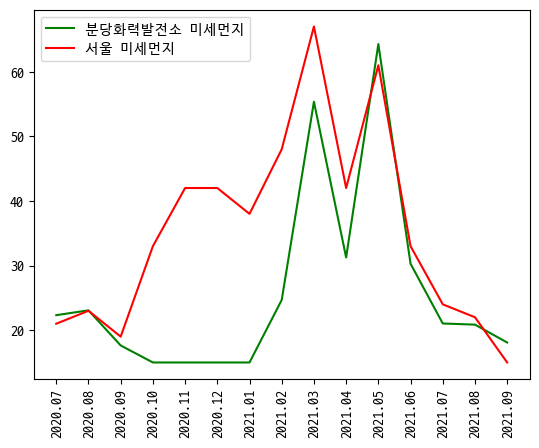

In [238]:
plt.plot(soulemis['날짜'], soulemis['미세먼지'], color='g', label='분당화력발전소 미세먼지')
plt.plot(soulemis['날짜'], soulemis['서울 미세먼지 농도'], color='r', label='서울 미세먼지')
# plt.plot(soulemis['날짜'], soulemis['초미세먼지'], color='y', label='사천 초미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [275]:
sachan = mis[mis['구분(2)'] == '사천']
sachan = sachan.iloc[:, 2:].copy()
sachan.reset_index(drop=True, inplace=True)
sachan = sachan.transpose().reset_index()
sachan.columns = ['날짜', '사천 미세먼지 농도']
sachan['사천 미세먼지 농도'] = sachan['사천 미세먼지 농도'].replace('30*', '30')
sachan['사천 미세먼지 농도'] = sachan['사천 미세먼지 농도'].astype(int)
sachan

,날짜,사천 미세먼지 농도
0,2020.01,32
1,2020.02,36
2,2020.03,31
3,2020.04,31
4,2020.05,28
5,2020.06,28
6,2020.07,16
7,2020.08,28
8,2020.09,22
9,2020.10,27


In [258]:
yodong = mis[mis['구분(2)'] == '영동']
yodong = yodong.iloc[:, 2:].copy()
yodong.reset_index(drop=True, inplace=True)
yodong = yodong.transpose().reset_index()
yodong.columns = ['날짜', '영동 미세먼지 농도']
yodong['영동 미세먼지 농도'] = yodong['영동 미세먼지 농도'].replace('31**', '31')
yodong['영동 미세먼지 농도'] = yodong['영동 미세먼지 농도'].astype(int)
yodong

,날짜,영동 미세먼지 농도
0,2020.01,41
1,2020.02,40
2,2020.03,42
3,2020.04,43
4,2020.05,33
5,2020.06,36
6,2020.07,16
7,2020.08,20
8,2020.09,20
9,2020.10,31


In [252]:
inc_df = inc.loc[6:, :]

In [253]:
inc_df.reset_index(drop=True, inplace=True)

In [254]:
inc_df

,날짜,인천 미세먼지 농도
0,2020.07,21
1,2020.08,24
2,2020.09,20
3,2020.10,34
4,2020.11,39
5,2020.12,39
6,2021.01,37
7,2021.02,46
8,2021.03,69
9,2021.04,42


In [259]:
soule_df = soule.loc[6:20]
sachan_df = sachan.loc[6:20]
yodong_df = yodong.loc[6:20]

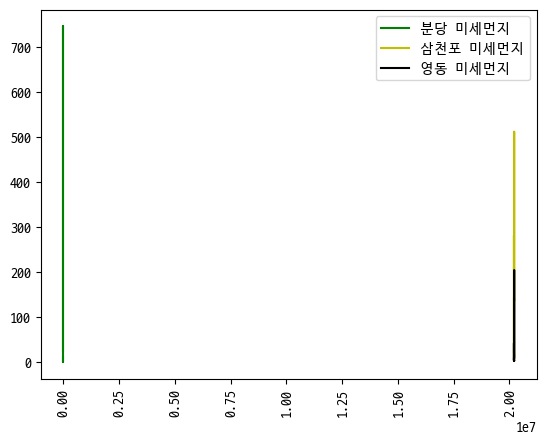

In [176]:
plt.plot(boondang1.index, boondang1['미세먼지'], color='g', label='분당 미세먼지')
# plt.plot(boondang1.index, boondang1['초미세먼지'], color='r', label='분당 초미세먼지')
plt.plot(samchanpo1.index, samchanpo1['미세먼지'], color='y', label='삼천포 미세먼지')
# plt.plot(samchanpo1.index, samchanpo1['초미세먼지'], color='b', label='삼천포 초미세먼지')
plt.plot(youngdong1.index, youngdong1['미세먼지'], color='black', label='영동 미세먼지')
# plt.plot(youngdong1.index, youngdong1['초미세먼지'], color='purple', label='영동 초미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()

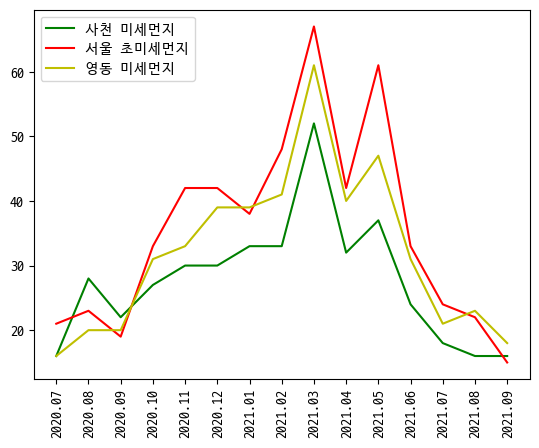

In [258]:
plt.plot(sachan_df['날짜'], sachan_df['사천 미세먼지 농도'], color='g', label='사천 미세먼지')
plt.plot(soule_df['날짜'], soule_df['서울 미세먼지 농도'], color='r', label='서울 초미세먼지')
plt.plot(yodong_df['날짜'], yodong_df['영동 미세먼지 농도'], color='y', label='영동 미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [243]:
youngh1.reset_index(drop=False, inplace=True)

In [244]:
youngh_df = youngh1.loc[0:29, :]

In [260]:
youngh_df

,일자,미세먼지,초미세먼지
0,2020.07,20.379896,9.720000
1,2020.08,22.648548,9.957312
2,2020.09,22.989278,41.654889
3,2020.10,56.488710,67.187849
4,2020.11,37.379444,39.047167
5,2020.12,37.466613,27.361452
6,2021.01,39.324194,31.764301
7,2021.02,48.495595,16.342976
8,2021.03,344.062419,81.095054
9,2021.04,42.010222,20.171611


In [261]:
inc_df

,날짜,인천 미세먼지 농도
0,2020.07,21
1,2020.08,24
2,2020.09,20
3,2020.10,34
4,2020.11,39
5,2020.12,39
6,2021.01,37
7,2021.02,46
8,2021.03,69
9,2021.04,42


In [262]:
incmis = pd.concat([inc_df, youngh_df], axis=1)
incmis.drop(columns='일자', inplace=True)

In [266]:
incmis.corr()

,날짜,인천 미세먼지 농도,미세먼지,초미세먼지
날짜,1.000000,0.043005,0.143044,-0.042484
인천 미세먼지 농도,0.043005,1.000000,0.470834,0.219548
미세먼지,0.143044,0.470834,1.000000,0.543935
초미세먼지,-0.042484,0.219548,0.543935,1.000000


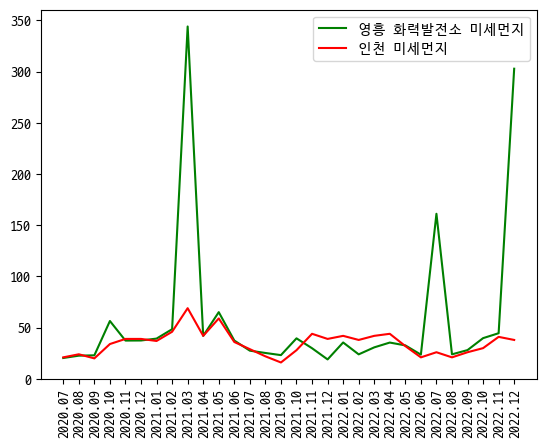

In [270]:
plt.plot(incmis['날짜'], incmis['미세먼지'], color='g', label='영흥 화력발전소 미세먼지')
plt.plot(incmis['날짜'], incmis['인천 미세먼지 농도'], color='r', label='인천 미세먼지')
# plt.plot(incmis['날짜'], incmis['초미세먼지'], color='y', label='영흥 초미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()

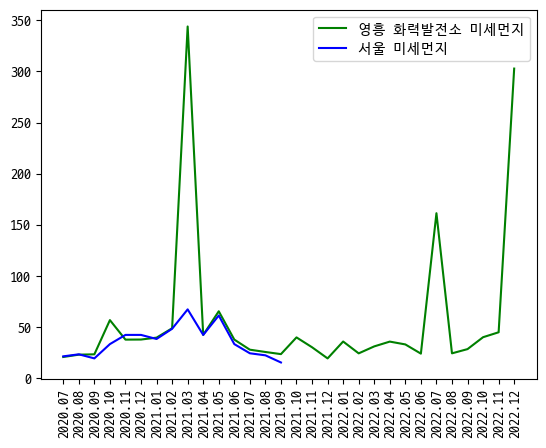

In [271]:
plt.plot(incmis['날짜'], incmis['미세먼지'], color='g', label='영흥 화력발전소 미세먼지')
plt.plot(soulemis['날짜'], soulemis['서울 미세먼지 농도'], color='b', label='서울 미세먼지')
# plt.plot(incmis['날짜'], incmis['인천 미세먼지 농도'], color='r', label='인천 미세먼지')
# plt.plot(incmis['날짜'], incmis['초미세먼지'], color='y', label='영흥 초미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [240]:
inc_ = mis[mis['구분(2)'] == '인천광역시']
inc_ = inc_.iloc[:, 2:].copy()
inc_.reset_index(drop=True, inplace=True)
inc_ = inc_.transpose().reset_index()
inc_.columns = ['날짜', '인천 미세먼지 농도']
inc_['인천 미세먼지 농도'] = inc_['인천 미세먼지 농도'].astype(int)
inc_

,날짜,인천 미세먼지 농도
0,2020.01,42
1,2020.02,37
2,2020.03,41
3,2020.04,39
4,2020.05,31
5,2020.06,32
6,2020.07,21
7,2020.08,24
8,2020.09,20
9,2020.10,34


In [247]:
inc_.loc[6:20]

,날짜,인천 미세먼지 농도
6,2020.07,21
7,2020.08,24
8,2020.09,20
9,2020.10,34
10,2020.11,39
11,2020.12,39
12,2021.01,37
13,2021.02,46
14,2021.03,69
15,2021.04,42


In [241]:
youngh1

,미세먼지,초미세먼지
일자,,
2020.07,20.379896,9.720000
2020.08,22.648548,9.957312
2020.09,22.989278,41.654889
2020.10,56.488710,67.187849
2020.11,37.379444,39.047167
2020.12,37.466613,27.361452
2021.01,39.324194,31.764301
2021.02,48.495595,16.342976
2021.03,344.062419,81.095054


In [ ]:
youngh1.reset_index(drop=False, inplace=True)

In [250]:
youngh1.drop('index', axis=1)

,일자,미세먼지,초미세먼지
0,2020.07,20.379896,9.720000
1,2020.08,22.648548,9.957312
2,2020.09,22.989278,41.654889
3,2020.10,56.488710,67.187849
4,2020.11,37.379444,39.047167
5,2020.12,37.466613,27.361452
6,2021.01,39.324194,31.764301
7,2021.02,48.495595,16.342976
8,2021.03,344.062419,81.095054
9,2021.04,42.010222,20.171611


In [279]:
samchanpo1.reset_index(drop=False, inplace=True)

In [280]:
samchanpo1

,일자,미세먼지,초미세먼지
0,2020.07,54.278864,24.608068
1,2020.08,82.496667,26.015370
2,2020.09,86.431722,24.136333
3,2020.10,54.666129,19.492688
4,2020.11,118.402667,18.224444
5,2020.12,101.476774,17.023226
6,2021.01,62.184140,18.689839
7,2021.02,35.572202,22.255714
8,2021.03,60.285914,39.142634
9,2021.04,34.405000,8.534778


In [282]:
sachan_df.reset_index(drop=True, inplace=True)

In [283]:
sachan_df

,날짜,사천 미세먼지 농도
0,2020.07,16
1,2020.08,28
2,2020.09,22
3,2020.10,27
4,2020.11,30
5,2020.12,30
6,2021.01,33
7,2021.02,33
8,2021.03,52
9,2021.04,32


In [284]:
sachanmis = pd.concat([sachan_df, samchanpo1], axis=1)
sachanmis.drop(columns='일자', inplace=True)

In [286]:
sachanmis.corr()

,날짜,사천 미세먼지 농도,미세먼지,초미세먼지
날짜,1.000000,0.159512,-0.782696,-0.423116
사천 미세먼지 농도,0.159512,1.000000,0.285163,0.575968
미세먼지,-0.782696,0.285163,1.000000,0.534602
초미세먼지,-0.423116,0.575968,0.534602,1.000000


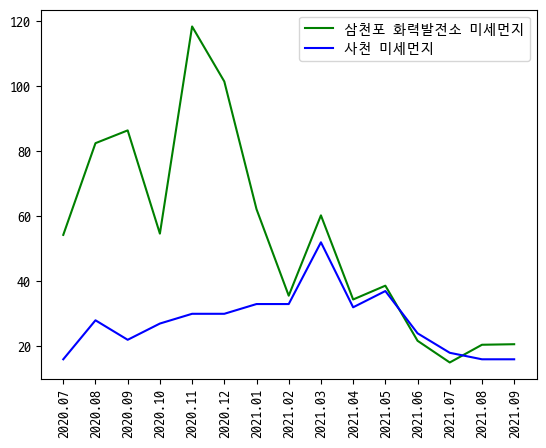

In [287]:
plt.plot(sachanmis['날짜'], sachanmis['미세먼지'], color='g', label='삼천포 화력발전소 미세먼지')
plt.plot(sachanmis['날짜'], sachanmis['사천 미세먼지 농도'], color='b', label='사천 미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [288]:
mis[mis['구분(2)'] == '강릉']

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
46,강원특별자치도,강릉,25,32,36,38,32,42,14**,17,...,42**,39,30,21,16,17,18,22,34,31


In [295]:
gangrung = mis[mis['구분(2)'] == '강릉']
gangrung = gangrung.iloc[:, 2:].copy()
gangrung.reset_index(drop=True, inplace=True)
gangrung = gangrung.transpose().reset_index()
gangrung.columns = ['날짜', '강릉 미세먼지 농도']
# gangrung['강릉 미세먼지 농도'] = gangrung['강릉 미세먼지 농도'].astype(int)
gangrung

,날짜,강릉 미세먼지 농도
0,2020.01,25
1,2020.02,32
2,2020.03,36
3,2020.04,38
4,2020.05,32
5,2020.06,42
6,2020.07,14**
7,2020.08,17
8,2020.09,27
9,2020.10,31


In [297]:
gangrung['강릉 미세먼지 농도'] = gangrung['강릉 미세먼지 농도'].replace('14**', '14')

In [298]:
gangrung['강릉 미세먼지 농도'] = gangrung['강릉 미세먼지 농도'].replace('42**', '42')

In [299]:
gangrung['강릉 미세먼지 농도'] = gangrung['강릉 미세먼지 농도'].astype(int)
gangrung

,날짜,강릉 미세먼지 농도
0,2020.01,25
1,2020.02,32
2,2020.03,36
3,2020.04,38
4,2020.05,32
5,2020.06,42
6,2020.07,14
7,2020.08,17
8,2020.09,27
9,2020.10,31


In [303]:
youngdong = bal2[bal2['사업소'] == '영동']

In [305]:
youngdong1 = youngdong.groupby('일자')[['미세먼지', '초미세먼지']].mean()

In [307]:
youngdong1.reset_index(drop=False, inplace=True)

In [308]:
youngdong1

,일자,미세먼지,초미세먼지
0,2020.07,7.812456,1.977193
1,2020.08,14.432688,3.526129
2,2020.09,13.129556,3.978111
3,2020.10,16.618659,7.184268
4,2020.11,17.385802,6.275926
5,2020.12,17.404045,6.748989
6,2021.01,17.328696,6.819891
7,2021.02,21.271786,7.928095
8,2021.03,27.054302,7.937791
9,2021.04,21.727812,4.530938


In [310]:
gangrung = gangrung.loc[6:20, :]

In [312]:
gangrung.reset_index(drop=True, inplace=True)

In [313]:
gangrungmis = pd.concat([youngdong1, gangrung], axis=1)
gangrungmis.drop(columns='일자', inplace=True)
gangrungmis

,미세먼지,초미세먼지,날짜,강릉 미세먼지 농도
0,7.812456,1.977193,2020.07,14
1,14.432688,3.526129,2020.08,17
2,13.129556,3.978111,2020.09,27
3,16.618659,7.184268,2020.10,31
4,17.385802,6.275926,2020.11,32
5,17.404045,6.748989,2020.12,30
6,17.328696,6.819891,2021.01,32
7,21.271786,7.928095,2021.02,39
8,27.054302,7.937791,2021.03,55
9,21.727812,4.530938,2021.04,45


In [315]:
gangrungmis.corr()

,미세먼지,초미세먼지,날짜,강릉 미세먼지 농도
미세먼지,1.000000,0.749741,0.181949,0.909799
초미세먼지,0.749741,1.000000,-0.011987,0.654743
날짜,0.181949,-0.011987,1.000000,0.336727
강릉 미세먼지 농도,0.909799,0.654743,0.336727,1.000000


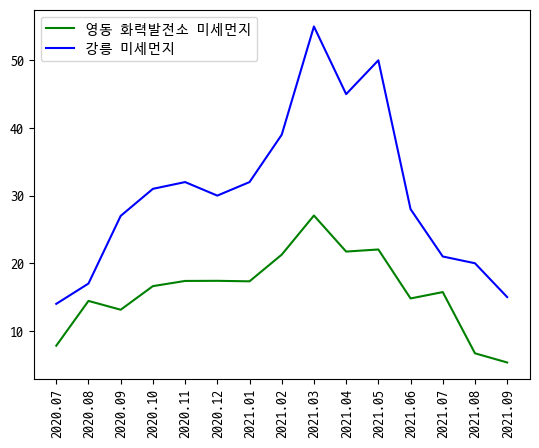

In [314]:
plt.plot(gangrungmis['날짜'], gangrungmis['미세먼지'], color='g', label='영동 화력발전소 미세먼지')
plt.plot(gangrungmis['날짜'], gangrungmis['강릉 미세먼지 농도'], color='b', label='강릉 미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [318]:
youngh_df = bal2[bal2['사업소'] == '영흥']

In [319]:
youngh_df = youngh_df.groupby('일자')[['미세먼지', '초미세먼지']].mean()

In [321]:
youngh_df.reset_index(drop=False, inplace=True)

In [322]:
youngh_df

,일자,미세먼지,초미세먼지
0,2020.07,20.379896,9.720000
1,2020.08,22.648548,9.957312
2,2020.09,22.989278,41.654889
3,2020.10,56.488710,67.187849
4,2020.11,37.379444,39.047167
5,2020.12,37.466613,27.361452
6,2021.01,39.324194,31.764301
7,2021.02,48.495595,16.342976
8,2021.03,344.062419,81.095054
9,2021.04,42.010222,20.171611


In [325]:
incdf = inc.loc[6:20]

In [327]:
youngh_df = youngh_df.loc[0:14,:]

In [329]:
incdf

,날짜,인천 미세먼지 농도
6,2020.07,21
7,2020.08,24
8,2020.09,20
9,2020.10,34
10,2020.11,39
11,2020.12,39
12,2021.01,37
13,2021.02,46
14,2021.03,69
15,2021.04,42


In [330]:
incdf.reset_index(drop=True, inplace=True)

In [331]:
youngh_df

,일자,미세먼지,초미세먼지
0,2020.07,20.379896,9.720000
1,2020.08,22.648548,9.957312
2,2020.09,22.989278,41.654889
3,2020.10,56.488710,67.187849
4,2020.11,37.379444,39.047167
5,2020.12,37.466613,27.361452
6,2021.01,39.324194,31.764301
7,2021.02,48.495595,16.342976
8,2021.03,344.062419,81.095054
9,2021.04,42.010222,20.171611


In [332]:
incmis2 = pd.concat([youngh_df, incdf], axis=1)
incmis2.drop(columns='일자', inplace=True)
incmis2

,미세먼지,초미세먼지,날짜,인천 미세먼지 농도
0,20.379896,9.720000,2020.07,21
1,22.648548,9.957312,2020.08,24
2,22.989278,41.654889,2020.09,20
3,56.488710,67.187849,2020.10,34
4,37.379444,39.047167,2020.11,39
5,37.466613,27.361452,2020.12,39
6,39.324194,31.764301,2021.01,37
7,48.495595,16.342976,2021.02,46
8,344.062419,81.095054,2021.03,69
9,42.010222,20.171611,2021.04,42


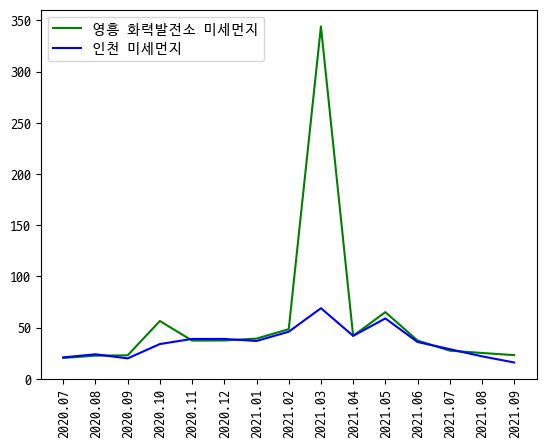

In [333]:
plt.plot(incmis2['날짜'], incmis2['미세먼지'], color='g', label='영흥 화력발전소 미세먼지')
plt.plot(incmis2['날짜'], incmis2['인천 미세먼지 농도'], color='b', label='인천 미세먼지')
plt.xticks(rotation=90)
plt.legend()
plt.show()